In [30]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Ariel\Documents\KULIAH\Semester 5\Data mining B\heart.csv", sep=',')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [31]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

              age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

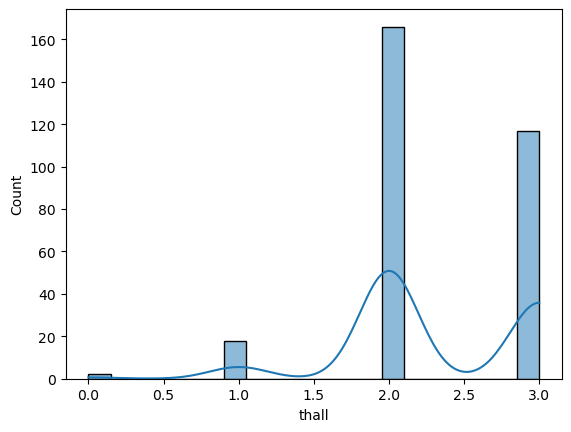

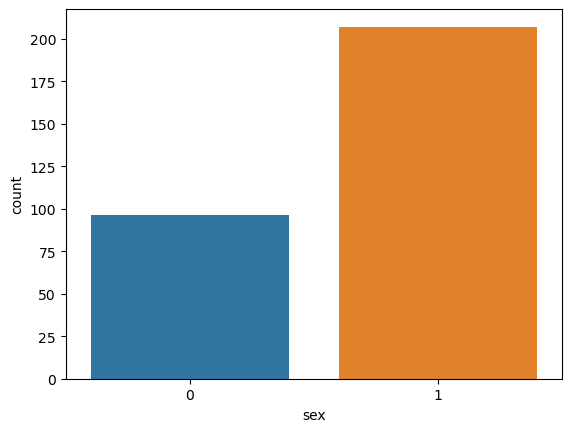

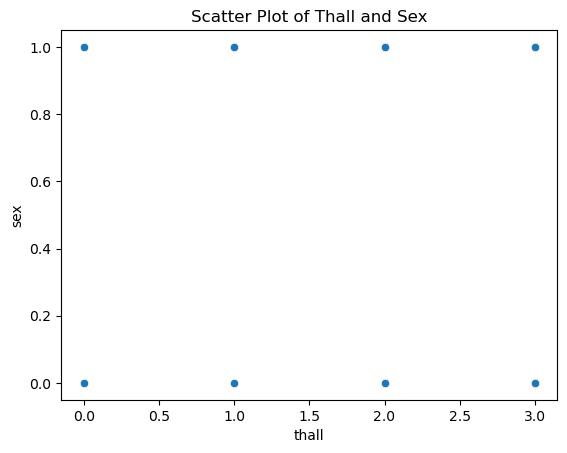

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
print(df.describe())
# Distribution Plots
sns.histplot(df['thall'], bins=20, kde=True)
plt.show()

# Count plot for a categorical variable
sns.countplot(x='sex', data=df)
plt.show()

# Scatter plot
sns.scatterplot(x='thall', y='sex', data=df)
plt.title('Scatter Plot of Thall and Sex')
plt.show()

In [33]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
X = df[['age', 'sex', 'trtbps', 'chol', 'fbs']]
Y = df['output']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [34]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [35]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg

LogisticRegression()

LogisticRegression()

In [36]:
y_pred = logreg.fit(scaled_X_train, Y_train).predict(scaled_X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score
print("confusion_matrix:",(confusion_matrix(Y_test,y_pred)))
print("Accuracy score: ",(accuracy_score(Y_test,y_pred)))

confusion_matrix: [[13 14]
 [11 23]]
Accuracy score:  0.5901639344262295


In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn 

KNeighborsClassifier()

In [39]:
knn = knn.fit(scaled_X_train, Y_train).predict(scaled_X_test)

c:\Users\Ariel\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [40]:
print("confusion_matrix:",(confusion_matrix(Y_test,knn)))
print("Accuracy score: ",(accuracy_score(Y_test,knn)))

confusion_matrix: [[18  9]
 [10 24]]
Accuracy score:  0.6885245901639344


Naive Bayes

In [41]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB()

In [42]:
y_pred = gnb.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [43]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))

Model accuracy score: 0.5410


Kesimpulan: 
Dari 3 klasifikasi 2 yang akurasinya paling tinggi adalah KNN, Logistic Regression, Naive Bayes